In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.max_rows", 300)

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
telecom = pd.read_csv("./telecom_churn_data.csv")

In [3]:
telecom.shape

(99999, 226)

In [4]:
telecom.info(max_cols=230)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [5]:
telecom.isnull().sum()[telecom.isnull().sum() != 0]

loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou_6             3937
loc_og_t2t_mou_7             3859
loc_og_t2t_mou_8             5378
loc_og_t2t_mou_9             7745
loc_og_t2m_mou_6             3937
loc_og_t2m_mou_7             3859
loc_og_t2m_mou_8             5378
loc_og_t2m_mou

### Cleaning the data

In [6]:
# Can remove the circle id and mobile_number

print("Number of unique values in mobile_number is " + str(telecom.mobile_number.nunique()))
print("Number of unique values in circle_id is " + str(telecom.circle_id.nunique()))

Number of unique values in mobile_number is 99999
Number of unique values in circle_id is 1


<i> We have all unique values in mobile numebr and all same value for circle_id. Hence it does not add any information. <br>
Hence we can remove those fields.

In [7]:
telecom.drop(["circle_id","mobile_number"], axis=1, inplace=True)

<i>There are various ways ot define a churn<br>
Revenu-based churn - Customers who have not utilised any revenue-generating facilities over a given period of time.<br>
Usage-based chrun - Customers who have not done any usage, either incoming or outgoing over a period of time.<br>
    
Here we are defining the churn as Usage-based churn and not Revenue-based churn. Thus the information like the number of days since the last revenue from the customer (which is the days from last recharge) can not be used to identify the churn. <br>
We are more concerned on the usage of services for defining the churn.<br>
<b>Hence we can remove the date fields.</b>

In [8]:
# cols = [col for col in telecom.columns if "date_of_last_rech_data" in col or "date_of_last_rech" in col or 'last_date_of_month' in col]
cols=   [
        'last_date_of_month_6', 'date_of_last_rech_6', 'date_of_last_rech_data_6',
        'last_date_of_month_7', 'date_of_last_rech_7', 'date_of_last_rech_data_7',
        'last_date_of_month_8', 'date_of_last_rech_8', 'date_of_last_rech_data_8',
        'last_date_of_month_9', 'date_of_last_rech_9', 'date_of_last_rech_data_9'
        ]
telecom.drop(cols, axis=1, inplace=True)
     

In [9]:
print(telecom["loc_og_t2o_mou"].value_counts())
print(telecom["std_og_t2o_mou"].value_counts())
print(telecom["loc_ic_t2o_mou"].value_counts())

0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64


In [10]:
cols=   [
        'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'
        ]
telecom.drop(cols, axis=1, inplace=True)
     

In [11]:
cols = [col for col in telecom.columns if "std_ic_t2o_mou_" in col or "std_og_t2c_mou" in col]
for col in cols:
#     print(col)
    print(telecom[col].value_counts())

0.0    96062
Name: std_og_t2c_mou_6, dtype: int64
0.0    96140
Name: std_og_t2c_mou_7, dtype: int64
0.0    94621
Name: std_og_t2c_mou_8, dtype: int64
0.0    92254
Name: std_og_t2c_mou_9, dtype: int64
0.0    96062
Name: std_ic_t2o_mou_6, dtype: int64
0.0    96140
Name: std_ic_t2o_mou_7, dtype: int64
0.0    94621
Name: std_ic_t2o_mou_8, dtype: int64
0.0    92254
Name: std_ic_t2o_mou_9, dtype: int64


In [12]:
cols = [col for col in telecom.columns if "std_ic_t2o_mou_" in col or "std_og_t2c_mou" in col]
telecom.drop(cols, axis=1, inplace=True)

<i>Cleaning the fields <b>av_rech_amt_data </b>and <b>total_rech_data</b> 

In [13]:
# Checking for the av_rech_amt_data and total_rech_data

cols = [col for col in telecom.columns if "av_rech_amt_data" in col or "total_rech_data" in col]
telecom.loc[:,cols]

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN
1,NaN,1.0,2.0,NaN,NaN,154.0,50.0,NaN
2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,2.0,NaN,NaN,NaN,39.0,NaN,NaN,NaN
99997,3.0,2.0,4.0,4.0,583.0,358.0,716.0,862.0


In [14]:
# Checking if we have any records in which the total_rech_data is null with non-zero av_rech_amt_data.
# We expect av_rech_amt_data to be NaN if total_rech_data is NaN

print("For month 6")
print(telecom[(telecom.total_rech_data_6.isnull()) & (~telecom.av_rech_amt_data_6.isnull())].shape)
print(telecom[(~telecom.total_rech_data_6.isnull()) & (telecom.av_rech_amt_data_6.isnull())].shape)

print("For month 7")
print(telecom[(telecom.total_rech_data_7.isnull()) & (~telecom.av_rech_amt_data_7.isnull())].shape)
print(telecom[(~telecom.total_rech_data_7.isnull()) & (telecom.av_rech_amt_data_7.isnull())].shape)

print("For month 8")
print(telecom[(telecom.total_rech_data_8.isnull()) & (~telecom.av_rech_amt_data_8.isnull())].shape)
print(telecom[(~telecom.total_rech_data_8.isnull()) & (telecom.av_rech_amt_data_8.isnull())].shape)

print("For month 9")
print(telecom[(telecom.total_rech_data_9.isnull()) & (~telecom.av_rech_amt_data_9.isnull())].shape)
print(telecom[(~telecom.total_rech_data_9.isnull()) & (telecom.av_rech_amt_data_9.isnull())].shape)

For month 6
(0, 201)
(0, 201)
For month 7
(0, 201)
(0, 201)
For month 8
(0, 201)
(0, 201)
For month 9
(0, 201)
(0, 201)


<i>Checking the total_rech_data and av_rech_amt_data are related. It looks like when the total_rech_data is NaN, 
av_rech_amt_data for the corresponding record is also Nan. This might be because the customer has not recharged for data in that particular month. Hence we can <b> impute the value for those missing values as 0.</b> <br>

total_rech_data = 0 means that user has not recharged for data in that month. <br>
av_rech_amt_data = 0 means that average recharge amount for data in that month is 0. </i>

In [15]:
# Imputing the missing values with 0

telecom["total_rech_data_6"].fillna(0,inplace = True)
telecom["total_rech_data_7"].fillna(0,inplace = True)
telecom["total_rech_data_8"].fillna(0,inplace = True)
telecom["total_rech_data_9"].fillna(0,inplace = True)

telecom["av_rech_amt_data_6"].fillna(0,inplace = True)
telecom["av_rech_amt_data_7"].fillna(0,inplace = True)
telecom["av_rech_amt_data_8"].fillna(0,inplace = True)
telecom["av_rech_amt_data_9"].fillna(0,inplace = True)

<i>Cleaning the fields <b>count_rech_2g </b>and <b>count_rech_3g</b> 

<i>We have NaN values for both count_rech_2g and count_rech_3g. We can assume the NaN values as 0, since the customer might not have done any recharge. <br>
    
Also after imputation, when we add both these columns for a particular month it matches with that of total_rech_data value. Thus validating our assumption. </i>

In [16]:
telecom["count_rech_2g_6"].fillna(0,inplace = True)
telecom["count_rech_3g_6"].fillna(0,inplace = True)

telecom["count_rech_2g_7"].fillna(0,inplace = True)
telecom["count_rech_3g_7"].fillna(0,inplace = True)

telecom["count_rech_2g_8"].fillna(0,inplace = True)
telecom["count_rech_3g_8"].fillna(0,inplace = True)

telecom["count_rech_2g_9"].fillna(0,inplace = True)
telecom["count_rech_3g_9"].fillna(0,inplace = True)

In [17]:
# Checking if the sum of count_rech_2g and count_rech_3g matches with that of total_rech_data

print("For month 6")
cols = ["count_rech_2g_6","count_rech_3g_6","total_rech_data_6"]
print(telecom[telecom.count_rech_2g_6+ telecom.count_rech_3g_6 != telecom.total_rech_data_6].shape)

print("For month 7")
cols = ["count_rech_2g_7","count_rech_3g_7","total_rech_data_7"]
print(telecom[telecom.count_rech_2g_7+ telecom.count_rech_3g_7 != telecom.total_rech_data_7].shape)

print("For month 8")
cols = ["count_rech_2g_8","count_rech_3g_8","total_rech_data_8"]
print(telecom[telecom.count_rech_2g_8+ telecom.count_rech_3g_8 != telecom.total_rech_data_8].shape)

print("For month 9")
cols = ["count_rech_2g_9","count_rech_3g_9","total_rech_data_9"]
print(telecom[telecom.count_rech_2g_9+ telecom.count_rech_3g_9 != telecom.total_rech_data_9].shape)

For month 6
(0, 201)
For month 7
(0, 201)
For month 8
(0, 201)
For month 9
(0, 201)


<i>Since we already have the total_rech_data, it might be redundant to have both count_rech_2g and count_rech_3g. <br>
The total_rech_data might be co-related to that as well. This point should be noted in the bivariate analysis and the field could be removed after further analysis. </i>

<i>Cleaning the fields <b>max_rech_data </b> </i>

In [18]:

# Checking if we have any records in which the max_rech_data is null with non-zero av_rech_amt_data.
# We expect max_rech_data to be NaN if av_rech_amt_data is 0

print("For month 6")
print(telecom[(telecom.max_rech_data_6.isnull()) & ~(telecom.av_rech_amt_data_6 == 0)].shape)
print(telecom[(~telecom.max_rech_data_6.isnull()) & (telecom.av_rech_amt_data_6 == 0)].shape)

print("For month 7")
print(telecom[(telecom.max_rech_data_7.isnull()) & ~(telecom.av_rech_amt_data_7 == 0)].shape)
print(telecom[(~telecom.max_rech_data_7.isnull()) & (telecom.av_rech_amt_data_7 == 0)].shape)

print("For month 8")
print(telecom[(telecom.max_rech_data_8.isnull()) & ~(telecom.av_rech_amt_data_8 == 0)].shape)
print(telecom[(~telecom.max_rech_data_8.isnull()) & (telecom.av_rech_amt_data_8 == 0)].shape)

print("For month 9")
print(telecom[(telecom.max_rech_data_9.isnull()) & ~(telecom.av_rech_amt_data_9 == 0)].shape)
print(telecom[(~telecom.max_rech_data_9.isnull()) & (telecom.av_rech_amt_data_9 == 0)].shape)

For month 6
(0, 201)
(0, 201)
For month 7
(0, 201)
(0, 201)
For month 8
(0, 201)
(0, 201)
For month 9
(0, 201)
(0, 201)


In [19]:
# Imputing the missing values with 0

telecom["max_rech_data_6"].fillna(0,inplace = True)
telecom["max_rech_data_7"].fillna(0,inplace = True)
telecom["max_rech_data_8"].fillna(0,inplace = True)
telecom["max_rech_data_9"].fillna(0,inplace = True)

In [20]:

# Checking if we have any records in which the max_rech_data is null with non-zero av_rech_amt_data.
# We expect max_rech_data to be NaN if av_rech_amt_data is 0

print("For month 6")
print(telecom[(telecom.max_rech_data_6.isnull()) & ~(telecom.av_rech_amt_data_6 == 0)].shape)
print(telecom[(~telecom.max_rech_data_6.isnull()) & (telecom.av_rech_amt_data_6 == 0)].shape)

print("For month 7")
print(telecom[(telecom.max_rech_data_7.isnull()) & ~(telecom.av_rech_amt_data_7 == 0)].shape)
print(telecom[(~telecom.max_rech_data_7.isnull()) & (telecom.av_rech_amt_data_7 == 0)].shape)

print("For month 8")
print(telecom[(telecom.max_rech_data_8.isnull()) & ~(telecom.av_rech_amt_data_8 == 0)].shape)
print(telecom[(~telecom.max_rech_data_8.isnull()) & (telecom.av_rech_amt_data_8 == 0)].shape)

print("For month 9")
print(telecom[(telecom.max_rech_data_9.isnull()) & ~(telecom.av_rech_amt_data_9 == 0)].shape)
print(telecom[(~telecom.max_rech_data_9.isnull()) & (telecom.av_rech_amt_data_9 == 0)].shape)

For month 6
(0, 201)
(74846, 201)
For month 7
(0, 201)
(74428, 201)
For month 8
(0, 201)
(73660, 201)
For month 9
(0, 201)
(74077, 201)


<i>Cleaning the fields <b>arpu_3g </b>and <b>arpu_2g</b> 

<i>For a record that has arpu_3g and arpu_2g as NaN value, the corresponding count_rech_2g and count_rech_3g are NaN.<br>
 Hence we can impute that as well with 0.

In [21]:
# Imputing the missing values with 0

telecom["arpu_3g_6"].fillna(0,inplace = True)
telecom["arpu_3g_7"].fillna(0,inplace = True)
telecom["arpu_3g_8"].fillna(0,inplace = True)
telecom["arpu_3g_9"].fillna(0,inplace = True)

telecom["arpu_2g_6"].fillna(0,inplace = True)
telecom["arpu_2g_7"].fillna(0,inplace = True)
telecom["arpu_2g_8"].fillna(0,inplace = True)
telecom["arpu_2g_9"].fillna(0,inplace = True)

In [22]:
# Imputing the missing values with 0

telecom["max_rech_data_6"].fillna(0,inplace = True)
telecom["max_rech_data_7"].fillna(0,inplace = True)
telecom["max_rech_data_8"].fillna(0,inplace = True)
telecom["max_rech_data_9"].fillna(0,inplace = True)

<i>Cleaning the fields <b>roam_ic_mou </b>and <b>roam_og_mou</b> 

In [23]:
# Checking if we have any records in which the incoming is NaN and outgoing is not NaN
# We expect roam_ic_mou to be NaN if roam_og_mou is NaN


print("For month 6")
print(telecom[(telecom.roam_ic_mou_6.isnull()) & (~telecom.roam_og_mou_6.isnull())].shape)
print(telecom[(~telecom.roam_ic_mou_6.isnull()) & (telecom.roam_og_mou_6.isnull())].shape)

print("For month 7")
print(telecom[(telecom.roam_ic_mou_7.isnull()) & (~telecom.roam_og_mou_7.isnull())].shape)
print(telecom[(~telecom.roam_ic_mou_7.isnull()) & (telecom.roam_og_mou_7.isnull())].shape)

print("For month 8")
print(telecom[(telecom.roam_ic_mou_8.isnull()) & (~telecom.roam_og_mou_8.isnull())].shape)
print(telecom[(~telecom.roam_ic_mou_8.isnull()) & (telecom.roam_og_mou_8.isnull())].shape)

For month 6
(0, 201)
(0, 201)
For month 7
(0, 201)
(0, 201)
For month 8
(0, 201)
(0, 201)


<i>It looks like when the roam_ic_mou is NaN, roam_og_mou for the corresponding record is also Nan. This might be because the customer is not in roaming and hence both roaming incoming mou and outgoing mou is NaN.</b> <br>

roam_ic_mou = 0 means that user does not have any incoming mou. <br>
roam_og_mou = 0 means that user does not have any outgoing mou </i>

In [24]:
# Imputing the missing values with 0

telecom["roam_ic_mou_6"].fillna(0,inplace = True)
telecom["roam_ic_mou_7"].fillna(0,inplace = True)
telecom["roam_ic_mou_8"].fillna(0,inplace = True)
telecom["roam_ic_mou_9"].fillna(0,inplace = True)

telecom["roam_og_mou_6"].fillna(0,inplace = True)
telecom["roam_og_mou_7"].fillna(0,inplace = True)
telecom["roam_og_mou_8"].fillna(0,inplace = True)
telecom["roam_og_mou_9"].fillna(0,inplace = True)

<i>Cleaning the fields <b>fb_user</b> and <b>night_pck_user</b>

<i>With similar logic, we are iputing the missing values in fb_user and night_pck_user as 0.<br>
 It is based on the assumption that value would be NaN if the customer has not availed that service.

In [25]:
telecom.fb_user_6.value_counts()

1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64

In [26]:
# Imputing the missing values with 0

telecom["fb_user_6"].fillna(0,inplace = True)
telecom["fb_user_7"].fillna(0,inplace = True)
telecom["fb_user_8"].fillna(0,inplace = True)
telecom["fb_user_9"].fillna(0,inplace = True)

In [27]:
telecom.night_pck_user_6.value_counts()

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64

In [28]:
# Imputing the missing values with 0

telecom["night_pck_user_6"].fillna(0,inplace = True)
telecom["night_pck_user_7"].fillna(0,inplace = True)
telecom["night_pck_user_8"].fillna(0,inplace = True)
telecom["night_pck_user_9"].fillna(0,inplace = True)

<i>Cleaning the <b>mou</b> fields.</i>

In [29]:
cols = [
    "onnet_mou_6", "offnet_mou_6", "loc_og_t2t_mou_6", "loc_og_t2m_mou_6", "loc_og_t2f_mou_6", "loc_og_t2c_mou_6", "loc_og_mou_6", "std_og_t2t_mou_6", "std_og_t2m_mou_6",
    "std_og_t2f_mou_6", "std_og_mou_6", "isd_og_mou_6", "spl_og_mou_6", "og_others_6", "loc_ic_t2t_mou_6", "loc_ic_t2m_mou_6", "loc_ic_t2f_mou_6",
    "loc_ic_mou_6", "std_ic_t2t_mou_6", "std_ic_t2m_mou_6", "std_ic_t2f_mou_6", "std_ic_mou_6", "spl_ic_mou_6", "isd_ic_mou_6", "ic_others_6"
]
telecom[telecom.onnet_mou_6.isnull()].groupby(by=cols).size()

Series([], dtype: int64)

In [30]:
telecom.loc[telecom.onnet_mou_6.isnull(),"offnet_mou_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"loc_og_t2t_mou_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"loc_og_t2m_mou_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"loc_og_t2f_mou_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"loc_og_t2c_mou_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"loc_og_mou_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"std_og_t2t_mou_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"std_og_t2m_mou_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"std_og_t2f_mou_6"] = 0
# telecom.loc[telecom.onnet_mou_6.isnull(),"std_og_t2c_mou_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"std_og_mou_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"isd_og_mou_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"spl_og_mou_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"og_others_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"loc_ic_t2t_mou_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"loc_ic_t2m_mou_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"loc_ic_t2f_mou_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"loc_ic_mou_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"std_ic_t2t_mou_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"std_ic_t2m_mou_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"std_ic_t2f_mou_6"] = 0
# telecom.loc[telecom.onnet_mou_6.isnull(),"std_ic_t2o_mou_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"std_ic_mou_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"spl_ic_mou_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"isd_ic_mou_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"ic_others_6"] = 0
telecom.loc[telecom.onnet_mou_6.isnull(),"onnet_mou_6"] = 0

In [31]:
cols = [
    "onnet_mou_7", "offnet_mou_7", "loc_og_t2t_mou_7", "loc_og_t2m_mou_7", "loc_og_t2f_mou_7", "loc_og_t2c_mou_7", "loc_og_mou_7", "std_og_t2t_mou_7", "std_og_t2m_mou_7",
    "std_og_t2f_mou_7", "std_og_mou_7", "isd_og_mou_7", "spl_og_mou_7", "og_others_7", "loc_ic_t2t_mou_7", "loc_ic_t2m_mou_7", "loc_ic_t2f_mou_7",
    "loc_ic_mou_7", "std_ic_t2t_mou_7", "std_ic_t2m_mou_7", "std_ic_t2f_mou_7", "std_ic_mou_7", "spl_ic_mou_7", "isd_ic_mou_7", "ic_others_7"
]
telecom[telecom.onnet_mou_7.isnull()].groupby(by=cols).size()

Series([], dtype: int64)

In [32]:
telecom.loc[telecom.onnet_mou_7.isnull(),"offnet_mou_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"loc_og_t2t_mou_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"loc_og_t2m_mou_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"loc_og_t2f_mou_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"loc_og_t2c_mou_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"loc_og_mou_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"std_og_t2t_mou_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"std_og_t2m_mou_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"std_og_t2f_mou_7"] = 0
# telecom.loc[telecom.onnet_mou_7.isnull(),"std_og_t2c_mou_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"std_og_mou_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"isd_og_mou_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"spl_og_mou_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"og_others_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"loc_ic_t2t_mou_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"loc_ic_t2m_mou_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"loc_ic_t2f_mou_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"loc_ic_mou_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"std_ic_t2t_mou_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"std_ic_t2m_mou_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"std_ic_t2f_mou_7"] = 0
# telecom.loc[telecom.onnet_mou_7.isnull(),"std_ic_t2o_mou_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"std_ic_mou_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"spl_ic_mou_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"isd_ic_mou_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"ic_others_7"] = 0
telecom.loc[telecom.onnet_mou_7.isnull(),"onnet_mou_7"] = 0.00

In [33]:
cols = [
    "onnet_mou_8", "offnet_mou_8", "loc_og_t2t_mou_8", "loc_og_t2m_mou_8", "loc_og_t2f_mou_8", "loc_og_t2c_mou_8", "loc_og_mou_8", "std_og_t2t_mou_8", "std_og_t2m_mou_8",
    "std_og_t2f_mou_8", "std_og_mou_8", "isd_og_mou_8", "spl_og_mou_8", "og_others_8", "loc_ic_t2t_mou_8", "loc_ic_t2m_mou_8", "loc_ic_t2f_mou_8",
    "loc_ic_mou_8", "std_ic_t2t_mou_8", "std_ic_t2m_mou_8", "std_ic_t2f_mou_8", "std_ic_mou_8", "spl_ic_mou_8", "isd_ic_mou_8", "ic_others_8"
]
telecom[telecom.onnet_mou_8.isnull()].groupby(by=cols).size()

Series([], dtype: int64)

In [34]:
telecom.loc[telecom.onnet_mou_8.isnull(),"offnet_mou_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"loc_og_t2t_mou_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"loc_og_t2m_mou_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"loc_og_t2f_mou_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"loc_og_t2c_mou_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"loc_og_mou_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"std_og_t2t_mou_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"std_og_t2m_mou_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"std_og_t2f_mou_8"] = 0
# telecom.loc[telecom.onnet_mou_8.isnull(),"std_og_t2c_mou_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"std_og_mou_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"isd_og_mou_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"spl_og_mou_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"og_others_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"loc_ic_t2t_mou_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"loc_ic_t2m_mou_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"loc_ic_t2f_mou_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"loc_ic_mou_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"std_ic_t2t_mou_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"std_ic_t2m_mou_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"std_ic_t2f_mou_8"] = 0
# telecom.loc[telecom.onnet_mou_8.isnull(),"std_ic_t2o_mou_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"std_ic_mou_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"spl_ic_mou_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"isd_ic_mou_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"ic_others_8"] = 0
telecom.loc[telecom.onnet_mou_8.isnull(),"onnet_mou_8"] = 0

In [35]:
cols = [
    "onnet_mou_9", "offnet_mou_9", "loc_og_t2t_mou_9", "loc_og_t2m_mou_9", "loc_og_t2f_mou_9", "loc_og_t2c_mou_9", "loc_og_mou_9", "std_og_t2t_mou_9", "std_og_t2m_mou_9",
    "std_og_t2f_mou_9", "std_og_mou_9", "isd_og_mou_9", "spl_og_mou_9", "og_others_9", "loc_ic_t2t_mou_9", "loc_ic_t2m_mou_9", "loc_ic_t2f_mou_9",
    "loc_ic_mou_9", "std_ic_t2t_mou_9", "std_ic_t2m_mou_9", "std_ic_t2f_mou_9", "std_ic_mou_9", "spl_ic_mou_9", "isd_ic_mou_9", "ic_others_9"
]
telecom[telecom.onnet_mou_9.isnull()].groupby(by=cols).size()

Series([], dtype: int64)

In [36]:
telecom.loc[telecom.onnet_mou_9.isnull(),"offnet_mou_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"loc_og_t2t_mou_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"loc_og_t2m_mou_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"loc_og_t2f_mou_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"loc_og_t2c_mou_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"loc_og_mou_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"std_og_t2t_mou_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"std_og_t2m_mou_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"std_og_t2f_mou_9"] = 0
# telecom.loc[telecom.onnet_mou_9.isnull(),"std_og_t2c_mou_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"std_og_mou_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"isd_og_mou_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"spl_og_mou_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"og_others_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"loc_ic_t2t_mou_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"loc_ic_t2m_mou_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"loc_ic_t2f_mou_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"loc_ic_mou_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"std_ic_t2t_mou_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"std_ic_t2m_mou_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"std_ic_t2f_mou_9"] = 0
# telecom.loc[telecom.onnet_mou_9.isnull(),"std_ic_t2o_mou_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"std_ic_mou_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"spl_ic_mou_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"isd_ic_mou_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"ic_others_9"] = 0
telecom.loc[telecom.onnet_mou_9.isnull(),"onnet_mou_9"] = 0

In [37]:
telecom.isnull().sum()[telecom.isnull().sum() != 0]

Series([], dtype: int64)

<i>All the values have been imputed and there are no null values in the dataset. </i>

### Finding the high value customers

In [38]:
cols = [
        "total_rech_data_6", "av_rech_amt_data_6", "total_rech_amt_data_6",
        "total_rech_data_7", "av_rech_amt_data_7", "total_rech_amt_data_7",
        "total_rech_data_8", "av_rech_amt_data_8", "total_rech_amt_data_8",
        "total_rech_data_9", "av_rech_amt_data_9", "total_rech_amt_data_9",
       ]

telecom["total_rech_amt_data_6"] = telecom["total_rech_data_6"] * telecom["av_rech_amt_data_6"]
telecom["total_rech_amt_data_7"] = telecom["total_rech_data_7"] * telecom["av_rech_amt_data_7"]
telecom["total_rech_amt_data_8"] = telecom["total_rech_data_8"] * telecom["av_rech_amt_data_8"]
telecom["total_rech_amt_data_9"] = telecom["total_rech_data_9"] * telecom["av_rech_amt_data_9"]
telecom.loc[:,cols]

,total_rech_data_6,av_rech_amt_data_6,total_rech_amt_data_6,total_rech_data_7,av_rech_amt_data_7,total_rech_amt_data_7,total_rech_data_8,av_rech_amt_data_8,total_rech_amt_data_8,total_rech_data_9,av_rech_amt_data_9,total_rech_amt_data_9
0,1.0,252.0,252.0,1.0,252.0,252.0,1.0,252.0,252.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,154.0,154.0,2.0,50.0,100.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,46.0,46.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,56.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,2.0,39.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,3.0,583.0,1749.0,2.0,358.0,716.0,4.0,716.0,2864.0,4.0,862.0,3448.0


In [39]:
telecom["avg_rech_amt"] = (telecom.total_rech_amt_6 + telecom.total_rech_amt_data_6 + telecom.total_rech_amt_7 + telecom.total_rech_amt_data_7)/2

In [40]:
telecom["avg_rech_amt"].describe()

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
75%        553.000000
max      61236.000000
Name: avg_rech_amt, dtype: float64

In [41]:
telecom_hv = telecom[telecom.avg_rech_amt >= telecom.avg_rech_amt.quantile(0.70)]

In [42]:
telecom_hv.shape

(30001, 206)

In [43]:
### Adding the churned tag to the dataset

In [44]:
telecom_hv.insert(len(telecom_hv.columns),"churned",0)
telecom_hv.loc[(telecom_hv.total_ic_mou_9 == 0) & (telecom_hv.total_og_mou_9 == 0) & (telecom_hv.vol_2g_mb_9 == 0) & (telecom_hv.vol_3g_mb_9 == 0),"churned"] = 1
telecom_hv["churned"].value_counts()

C:\Users\91967\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


0    27560
1     2441
Name: churned, dtype: int64

In [45]:
telecom_hv.shape

(30001, 207)

### Removing the fields corresponding to the month September (9)

In [46]:
cols = [col for col in telecom_hv.columns if "_9" not in col and "sep" not in col]
telecom_hv[cols].shape

(30001, 156)

In [47]:
len([col for col in telecom_hv.columns if "_9" in col])

50

In [48]:
telecom_hv = telecom_hv[cols]

In [49]:
telecom_hv.shape

(30001, 156)

In [50]:
telecom_hv.info(max_cols=230)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 156 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   arpu_6                 30001 non-null  float64
 1   arpu_7                 30001 non-null  float64
 2   arpu_8                 30001 non-null  float64
 3   onnet_mou_6            30001 non-null  float64
 4   onnet_mou_7            30001 non-null  float64
 5   onnet_mou_8            30001 non-null  float64
 6   offnet_mou_6           30001 non-null  float64
 7   offnet_mou_7           30001 non-null  float64
 8   offnet_mou_8           30001 non-null  float64
 9   roam_ic_mou_6          30001 non-null  float64
 10  roam_ic_mou_7          30001 non-null  float64
 11  roam_ic_mou_8          30001 non-null  float64
 12  roam_og_mou_6          30001 non-null  float64
 13  roam_og_mou_7          30001 non-null  float64
 14  roam_og_mou_8          30001 non-null  float64
 15  l

In [51]:
telecom_hv["churned"].value_counts()

0    27560
1     2441
Name: churned, dtype: int64

In [52]:
telecom_hv.shape

(30001, 156)

### EDA

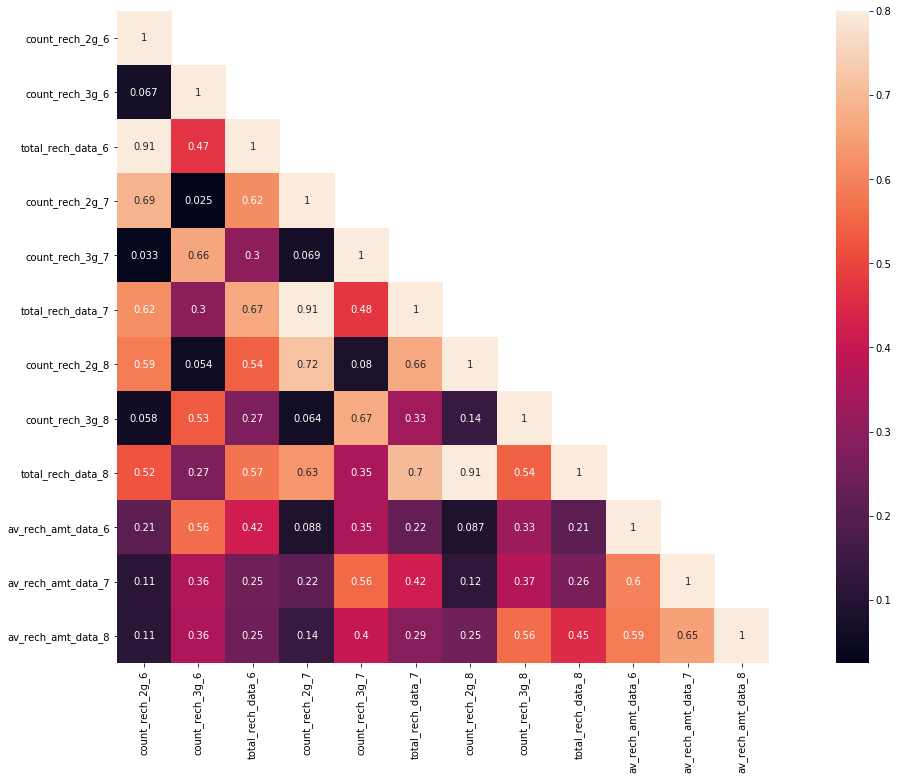

In [53]:
# heatmap

cols = ["count_rech_2g_6","count_rech_3g_6","total_rech_data_6", 
        "count_rech_2g_7","count_rech_3g_7","total_rech_data_7",
        "count_rech_2g_8","count_rech_3g_8","total_rech_data_8",
        "av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8"]
cor = telecom_hv.loc[:,cols].corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(24,12)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

In [54]:
telecom_hv.shape

(30001, 156)

In [55]:
cols = [col for col in telecom_hv.columns if "count_rech_" not in col]
telecom_hv = telecom_hv[cols]
telecom_hv.shape

(30001, 150)

<i>Calculating the change in MOU for the good phase (for months June and July).</i>

In [56]:
telecom_hv.shape

(30001, 150)

In [57]:
cols = list(set([col[:-2] for col in telecom_hv.columns if "mou" in col and ("6" in col or "7" in col)]))
cols
for col in cols:
    telecom_hv[col + "_chng"] = (((telecom_hv[col+"_6"] + telecom_hv[col+"_7"])/2)-telecom_hv[col+"_8"])

In [58]:
cols = [col for col in telecom_hv.columns if ("mou" not in col) or ("_chng" in col)]
cols
telecom_hv = telecom_hv[cols]

In [59]:
telecom_hv.shape

(30001, 96)

In [60]:
# Columns for which we still have individual month data

[col for col in telecom_hv.columns if "_chng" not in col]

['arpu_6',
 'arpu_7',
 'arpu_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',

In [61]:
telecom_hv.shape

(30001, 96)

In [62]:
cols = ["arpu", "og_others", "ic_others", "total_rech_amt", "max_rech_amt", "last_day_rch_amt", 
        "max_rech_data", "av_rech_amt_data", "total_rech_amt_data",
       "vol_2g_mb", "vol_3g_mb", "arpu_3g", "arpu_2g"]


for col in cols:
    telecom_hv[col + "_chng"] = (((telecom_hv[col+"_6"] + telecom_hv[col+"_7"])/2)-telecom_hv[col+"_8"])

In [63]:
telecom_hv.shape

(30001, 109)

In [64]:
cols = ["arpu", "og_others", "ic_others", "total_rech_amt", "max_rech_amt", "last_day_rch_amt", 
        "max_rech_data", "av_rech_amt_data", "total_rech_amt_data",
       "vol_2g_mb", "vol_3g_mb", "arpu_3g", "arpu_2g"]

updated_cols = []
for col in telecom_hv.columns:
    flag = 0
    for del_col in cols:
        if del_col in col and "_chng" not in col:
            flag = 1
            break;
    if flag == 0:
        updated_cols.append(col)
        
telecom_hv = telecom_hv[updated_cols]

In [65]:
telecom_hv.shape

(30001, 70)

In [66]:
# Columns for which we still have individual month data

[col for col in telecom_hv.columns if "_chng" not in col]

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'aon',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'avg_rech_amt',
 'churned']

In [67]:
for col in telecom_hv.columns:
    if telecom_hv[col].nunique() >= 150:
        print(col + " - " + str(telecom_hv[col].nunique()))

aon - 3294
aug_vbc_3g - 9840
jul_vbc_3g - 10007
jun_vbc_3g - 9285
avg_rech_amt - 5183
loc_ic_t2f_mou_chng - 14244
std_og_t2t_mou_chng - 16890
roam_og_mou_chng - 8881
spl_og_mou_chng - 12151
loc_ic_mou_chng - 27459
isd_og_mou_chng - 2055
loc_og_t2m_mou_chng - 26152
offnet_mou_chng - 28048
std_og_t2f_mou_chng - 4026
std_ic_t2m_mou_chng - 17680
loc_og_t2c_mou_chng - 5933
spl_ic_mou_chng - 568
loc_og_t2f_mou_chng - 10077
std_ic_mou_chng - 20592
loc_ic_t2t_mou_chng - 23236
loc_og_t2t_mou_chng - 22949
std_ic_t2f_mou_chng - 5924
roam_ic_mou_chng - 8056
std_og_t2m_mou_chng - 20499
total_ic_mou_chng - 27878
onnet_mou_chng - 26215
loc_ic_t2m_mou_chng - 26603
std_ic_t2t_mou_chng - 12862
total_og_mou_chng - 28458
std_og_mou_chng - 22423
isd_ic_mou_chng - 6951
loc_og_mou_chng - 27111
arpu_chng - 29918
og_others_chng - 989
ic_others_chng - 4425
total_rech_amt_chng - 4117
max_rech_amt_chng - 1509
last_day_rch_amt_chng - 1399
max_rech_data_chng - 867
av_rech_amt_data_chng - 2011
total_rech_amt_data_ch

In [68]:
for col in telecom_hv.columns:
    if telecom_hv[col].nunique() < 150:
        print(col + " - " + str(telecom_hv[col].nunique()))

total_rech_num_6 - 102
total_rech_num_7 - 101
total_rech_num_8 - 96
total_rech_data_6 - 38
total_rech_data_7 - 43
total_rech_data_8 - 47
night_pck_user_6 - 2
night_pck_user_7 - 2
night_pck_user_8 - 2
monthly_2g_6 - 5
monthly_2g_7 - 6
monthly_2g_8 - 6
sachet_2g_6 - 31
sachet_2g_7 - 35
sachet_2g_8 - 34
monthly_3g_6 - 12
monthly_3g_7 - 15
monthly_3g_8 - 12
sachet_3g_6 - 25
sachet_3g_7 - 27
sachet_3g_8 - 29
fb_user_6 - 2
fb_user_7 - 2
fb_user_8 - 2
churned - 2


In [69]:
telecom_hv.monthly_2g_6.value_counts()

0    25394
1     4021
2      551
3       28
4        7
Name: monthly_2g_6, dtype: int64

# TBD

In [70]:
cols = [col for col in telecom_hv.columns if "night_pck_user_" in col or "fb_user_" in col]
for col in cols:
    print(telecom_hv[col].value_counts())

0.0    29594
1.0      407
Name: night_pck_user_6, dtype: int64
0.0    29626
1.0      375
Name: night_pck_user_7, dtype: int64
0.0    29660
1.0      341
Name: night_pck_user_8, dtype: int64
1.0    15525
0.0    14476
Name: fb_user_6, dtype: int64
1.0    15722
0.0    14279
Name: fb_user_7, dtype: int64
0.0    15688
1.0    14313
Name: fb_user_8, dtype: int64


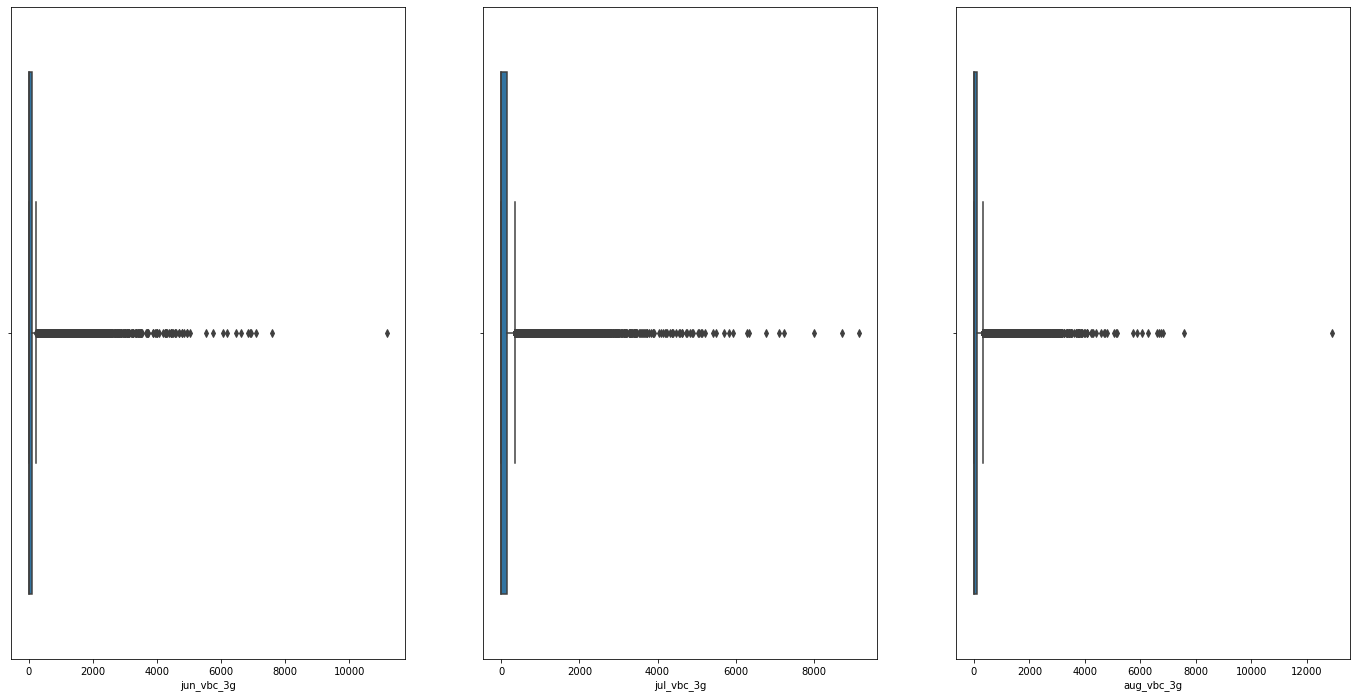

In [71]:
cols = [col for col in telecom_hv.columns if "vbc" in col]
cols
plt.figure(figsize=(24,12))
plt.subplot(1,3,1)
sns.boxplot(telecom_hv["jun_vbc_3g"])
plt.subplot(1,3,2)
sns.boxplot(telecom_hv["jul_vbc_3g"])
plt.subplot(1,3,3)
sns.boxplot(telecom_hv["aug_vbc_3g"])

